In [6]:
import os
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
from copy import deepcopy
import numpy as np
import ml_confs
configs = ml_confs.from_file('configs.yaml')
configs.tabulate()

/home/novelli/anaconda3/envs/kooplearn/lib/python3.11/site-packages/ml_confs/lib.py:146: UserWarning: Unable to import JAX. The argument `register_jax_pytree` will be ignored. To suppress this warning, load the configurations with `register_jax_pytree=False`.
  warn('Unable to import JAX. The argument `register_jax_pytree` will be ignored. To suppress this warning, load the configurations with `register_jax_pytree=False`.')


┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃ Key           ┃ Value ┃ Type  ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ classes       │ 5     │ int   │
│ train_samples │ 1001  │ int   │
│ val_ratio     │ 0.2   │ float │
│ test_samples  │ 1001  │ int   │
│ num_rng_seeds │ 20    │ int   │
│ batch_size    │ 128   │ int   │
│ eval_up_to_t  │ 15    │ int   │
│ reduced_rank  │ True  │ bool  │
│ max_epochs    │ 100   │ int   │
│ trial_budget  │ 100   │ int   │
└───────────────┴───────┴───────┘

In [7]:
#List and unpickle all files in "results/"
reports = []
for file in os.listdir("results/"):
    if file.endswith(".pkl"):
        with open("results/"+file, "rb") as f:
            reports.append(pickle.load(f))

def get_series(report, key):
    report = deepcopy(report)
    model_name = report.pop("name")
    series = np.zeros(len(report))
    for k, v in report.items():
        idx = int(k.split('_')[0]) - 2
        series[idx] = v.get(key, 0)
    feature_dims = np.arange(len(report)) + 2
    return feature_dims, series, model_name

In [17]:
list(reports[3].keys())

['accuracy', 'label', 'image', 'fit_time', 'name']

Text(0.5, 1.0, 'Classifier accuracy')

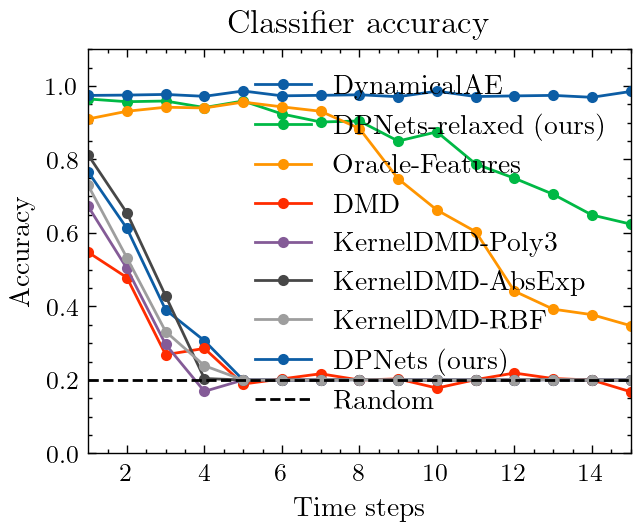

In [5]:
fig, ax = plt.subplots()
for report in reports:
    report = deepcopy(report)
    model_name = report.pop("name")
    t = list(range(1, configs.eval_up_to_t + 1))
    acc = np.array(report['accuracy'])
    if model_name in ['DPNets', 'DPNets-relaxed']:
        model_name = model_name + ' (ours)'
        ax.plot(t, acc, '.-', lw=1.0, label=model_name)
    else:
        ax.plot(t, acc, '.-', label=model_name)

ax.axhline(1/configs.classes, color='black', linestyle='--', label='Random')

ax.legend(frameon=False)
ax.margins(x=0)
ax.set_ylim(0, 1.1)
ax.set_xlabel('Time steps')
ax.set_ylabel('Accuracy')
ax.set_title('Classifier accuracy')
